In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('C:/Users/Anmol/Desktop/data science/student.csv')
data.shape

(1000, 3)

In [3]:
data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [4]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

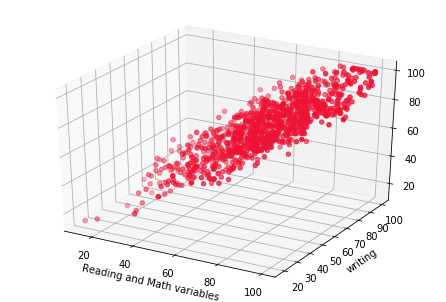

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.xlabel('Reading and Math variables')
plt.ylabel('writing')
plt.show()

In [6]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
# initial cofficients
B = np.array([0,0,0])
Y = np.array(write)
alpha = 0.0001

In [7]:
def cost_function(X,Y,B):
    m = len(Y)
    J = np.sum((X.dot(B)-Y)**2)/(2*m)
    return J
intial_cost = cost_function(X,Y,B)
print(intial_cost)

2470.11


In [8]:
def gradient_descent(X,Y,B,alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # hypothesis values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h-Y
        #gradient Calculation
        gradient = X.T.dot (loss) / m
        #Changing values of B using gradint
        B = B-alpha * gradient
        #new cost values
        cost = cost_function(X,Y,B)
        cost_history[iteration] = cost
    return B, cost_history

In [9]:
#100000 iterations
newB, cost_history = gradient_descent(X,Y,B,alpha,100000)
#new values of B
print('new coefficient:')
print(newB)

#final cost of new B
print("Final cost:")
print(np.min(cost_history))

new coefficient:
[-0.47889172  0.09137252  0.90144884]
Final cost:
10.475123473539167


In [10]:
# model Evalution - Rmse
def rmse(Y,Y_pred):
    rmse = np.sqrt(sum(Y - Y_pred)**2)/len(Y)
    return rmse
# model Evalution -R2 score
def r2_score(Y,Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y)**2)
    ss_res = sum((Y - Y_pred)**2)
    r2 = (ss_res / ss_tot)
    return r2
Y_pred = X.dot(newB)
print("RMSE:")
print(rmse(Y,Y_pred))
print("R2 Score:")
print(r2_score(Y,Y_pred))


RMSE:
0.03959836179908912
R2 Score:
0.09027767269384467


# Machine learning

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# X and Y Values
X = np.array([math,read]).T
Y = np.array(write)

# Model Inialization
reg = LinearRegression()
# data fitting
reg = reg.fit(X,Y)
# Y prediction
Y_pred = reg.predict(X)
# model evaluation
rmse = np.sqrt(mean_squared_error(Y,Y_pred))
r2 = reg.score(X,Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


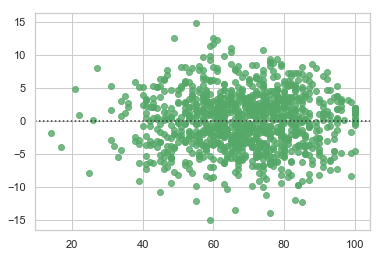

In [12]:
import seaborn as sb
sb.set(style='whitegrid')
sb.residplot(Y,Y_pred, color='g')

In [13]:
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((1000,1)).astype(int),values=X,axis=1)
regressor_OLS =sm.OLS(endog=Y,exog=X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     5034.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:51:17   Log-Likelihood:                -2939.1
No. Observations:                1000   AIC:                             5884.
Df Residuals:                     997   BIC:                             5899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4624      0.722     -2.026      0.043      -2.879      -0.046
x1             0.0960      0.016      5.910      0.000       0.064       0.128
x2             0.9105      0.017     54.457      0.000       0.878       0.943
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.537
Skew:                          -0.001   Prob(JB):                        0.765
Kurtosis:                       3.113   Cond. No.                         494.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""